In this week 9 session, we are going to learn about regularization technique. It is a technique that is used to improve generalization of a model so that the gap between the training and error is reduced.

One of the most common generalization technique is weight decay. It is implemented by adding a penalty term to the loss function (L1 Regularization)

There is a more common variation where the weights in the sum are squared. This is called L2 regularization.

In [1]:
# Import needed libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import logging

# Set level for TensorFlow logger instance
tf.get_logger().setLevel(logging.ERROR)

# Define the hyperparameters
EPOCHS = 500
BATCH_SIZE = 16

# Read the boston housing data provided by keras
boston_housing = keras.datasets.boston_housing

# Assign the dataset value into variables
(raw_x_train, y_train), (raw_x_test, y_test) = boston_housing.load_data()

# Process of counting the mean and standard deviation
x_mean = np.mean(raw_x_train, axis = 0)
x_stddev = np.std(raw_x_train, axis = 0)

# Extract new values to be used as train and test dataset
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

2022-12-10 11:37:25.924570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 11:37:26.087532: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-10 11:37:26.152420: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-10 11:37:26.866844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
# Create and train model
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = [13]))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

2022-12-10 11:37:27.727099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 11:37:27.760625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 11:37:27.760824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 11:37:27.761662: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

26/26 - 1s - loss: 513.4255 - mean_absolute_error: 20.5429 - val_loss: 396.2983 - val_mean_absolute_error: 17.5780 - 952ms/epoch - 37ms/step
Epoch 2/500
26/26 - 0s - loss: 187.3112 - mean_absolute_error: 11.1019 - val_loss: 73.2948 - val_mean_absolute_error: 6.5792 - 57ms/epoch - 2ms/step
Epoch 3/500
26/26 - 0s - loss: 77.7919 - mean_absolute_error: 6.6489 - val_loss: 34.9405 - val_mean_absolute_error: 4.4931 - 95ms/epoch - 4ms/step
Epoch 4/500
26/26 - 0s - loss: 47.9544 - mean_absolute_error: 5.0868 - val_loss: 27.4441 - val_mean_absolute_error: 3.9161 - 76ms/epoch - 3ms/step
Epoch 5/500
26/26 - 0s - loss: 38.6649 - mean_absolute_error: 4.6876 - val_loss: 23.4644 - val_mean_absolute_error: 3.6035 - 61ms/epoch - 2ms/step
Epoch 6/500
26/26 - 0s - loss: 34.1784 - mean_absolute_error: 4.3301 - val_loss: 24.0313 - val_mean_absolute_error: 3.5358 - 69ms/epoch - 3ms/step
Epoch 7/500
26/26 - 0s - loss: 41.3295 - mean_absolute_error: 4.8570 - val_loss: 23.6322 - val_mean_absolute_error: 3.5552

Let's do an experiment. We are going to make several different configuration/architecture for the neuron. And let's compare them based on the next table.

<table>
  <tr>
    <th>CONFIGURATION</th>
    <th>TOPOLOGY</th>
    <th>REGULARIZATION</th>
    <th>TRAINING ERROR</th>
    <th>TEST ERROR</th>
  </tr>
  <tr>
    <td><b>Conf1</b></td>
    <td>1</td>
    <td>None</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Conf2</b></td>
    <td>64/64/1</td>
    <td>None</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Conf3</b></td>
    <td>64/64/1</td>
    <td>L2=0.1</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Conf4</b></td>
    <td>64/64/1</td>
    <td>Dropout=0.2</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Conf5</b></td>
    <td>128/128/64/1</td>
    <td>Dropout=0.2</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Conf6</b></td>
    <td>128/128/64/1</td>
    <td>Dropout=0.3</td>
    <td>...</td>
    <td>...</td>
  </tr>
  <tr>
    <td><b>Custom Conf</b></td>
    <td>128/128/64/1</td>
    <td>L2=0.1 & Dropout=0.2</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [3]:
# import L2 Regularization
from tensorflow.keras.regularizers import l2

# Configuration 1

In [4]:
# Create and train model
model = Sequential()
model.add(Dense(1, activation = 'linear', input_shape = [13]))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history1 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 586.3483 - mean_absolute_error: 22.3827 - val_loss: 613.5991 - val_mean_absolute_error: 23.0979 - 219ms/epoch - 8ms/step
Epoch 2/500
26/26 - 0s - loss: 583.6588 - mean_absolute_error: 22.3574 - val_loss: 610.5179 - val_mean_absolute_error: 23.0637 - 48ms/epoch - 2ms/step
Epoch 3/500
26/26 - 0s - loss: 580.9854 - mean_absolute_error: 22.3313 - val_loss: 607.3599 - val_mean_absolute_error: 23.0286 - 59ms/epoch - 2ms/step
Epoch 4/500
26/26 - 0s - loss: 578.3209 - mean_absolute_error: 22.3027 - val_loss: 604.6039 - val_mean_absolute_error: 22.9946 - 70m

CONF 1 Result : <br>
mean_absolute_error = 10.1523 <br>
val_mean_absolute_error = 10.2071

# Configuration 2

In [5]:
# Create and train model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = [13]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history2 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                896       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 550.3673 - mean_absolute_error: 21.4852 - val_loss: 531.7894 - val_mean_absolute_error: 21.0693 - 277ms/epoch - 11ms/step
Epoch 2/500
26/26 - 0s - loss: 438.5440 - mean_absolute_error: 18.7091 - val_loss: 374.3700 - val_mean_absolute_error: 17.0844 - 43ms/epoch - 2ms/step
Epoch 3/500


CONF 2 Result : <br>
mean_absolute_error = 0.6791 <br>
val_mean_absolute_error = 2.3898

# Configuration 3

In [6]:
# Create and train model
model = Sequential()
model.add(Dense(64, activation = 'relu',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1),
                input_shape = [13]))
model.add(Dense(64, activation = 'relu',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1)))
model.add(Dense(1, activation = 'linear',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1)))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history3 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                896       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 534.5374 - mean_absolute_error: 20.9840 - val_loss: 500.7242 - val_mean_absolute_error: 20.1571 - 304ms/epoch - 12ms/step
Epoch 2/500
26/26 - 0s - loss: 405.3640 - mean_absolute_error: 17.6264 - val_loss: 328.3310 - val_mean_absolute_error: 15.7768 - 49ms/epoch - 2ms/step
Epoch 3/500


CONF 3 Result : <br>
mean_absolute_error = 1.6424 <br>
val_mean_absolute_error = 2.7008

# Configuration 4

In [7]:
# Create and train model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = [13]))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history4 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                896       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 0s - loss: 538.2213 - mean_absol

CONF 4 Result : <br>
mean_absolute_error = 2.2236 <br>
val_mean_absolute_error = 2.5584

# Configuration 5

In [8]:
# Create and train model
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = [13]))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history5 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1792      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

CONF 5 Result : <br>
mean_absolute_error = 1.9345 <br>
val_mean_absolute_error = 2.1270

# Configuration 6

In [9]:
# Create and train model
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = [13]))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history6 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1792      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                

CONF 6 Result : <br>
mean_absolute_error = 2.2837 <br>
val_mean_absolute_error = 2.3219

# Custom Configuration

In [10]:
# Create and train model
model = Sequential()
model.add(Dense(128, activation = 'relu',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1),
                input_shape = [13]))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu',
                kernel_regularizer = l2(0.1),
                bias_regularizer = l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

history7 = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    shuffle = 2)

# Print first 4 predictions
predictions = model.predict(x_test)
for i in range(0, 4):
  print('Prediction: ', predictions[i, 0], ', true value: ', y_test[i])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1792      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                

Custom Configuration Result : <br>
mean_absolute_error = 2.3837 <br>
val_mean_absolute_error = 2.7067

# Result and Conclusion

Based from the result above, we are going to show the comparison between them. We will use pandas and matplotlib library to do this.

Result Table

In [11]:
import pandas as pd

data = {
  "TOPOLOGY": ['1', '64/64/1', '64/64/1', '64/64/1', '128/128/64/1', '128/128/64/1', '128/128/64/1'],
  "REGULARIZATION": ['None', 'None', 'L2=0.1', 'Dropout=0.2', 'Dropout=0.2', 'Dropout=0.3', 'L2=0.1 & Dropout=0.2'],
  "TRAINING ERROR": [10.1523, 0.6791, 1.6424, 2.2236, 1.9345, 2.2837, 2.3837],
  "TEST ERROR": [10.2071, 2.3898, 2.7008, 2.5584, 2.1270, 2.3219, 2.7067]
}

df = pd.DataFrame(data, index = ["Conf1", "Conf2", "Conf3", "Conf4", "Conf5", "Conf6", "Custom Conf"])

print(df) 

                 TOPOLOGY        REGULARIZATION  TRAINING ERROR  TEST ERROR
Conf1                   1                  None         10.1523     10.2071
Conf2             64/64/1                  None          0.6791      2.3898
Conf3             64/64/1                L2=0.1          1.6424      2.7008
Conf4             64/64/1           Dropout=0.2          2.2236      2.5584
Conf5        128/128/64/1           Dropout=0.2          1.9345      2.1270
Conf6        128/128/64/1           Dropout=0.3          2.2837      2.3219
Custom Conf  128/128/64/1  L2=0.1 & Dropout=0.2          2.3837      2.7067


Result graph

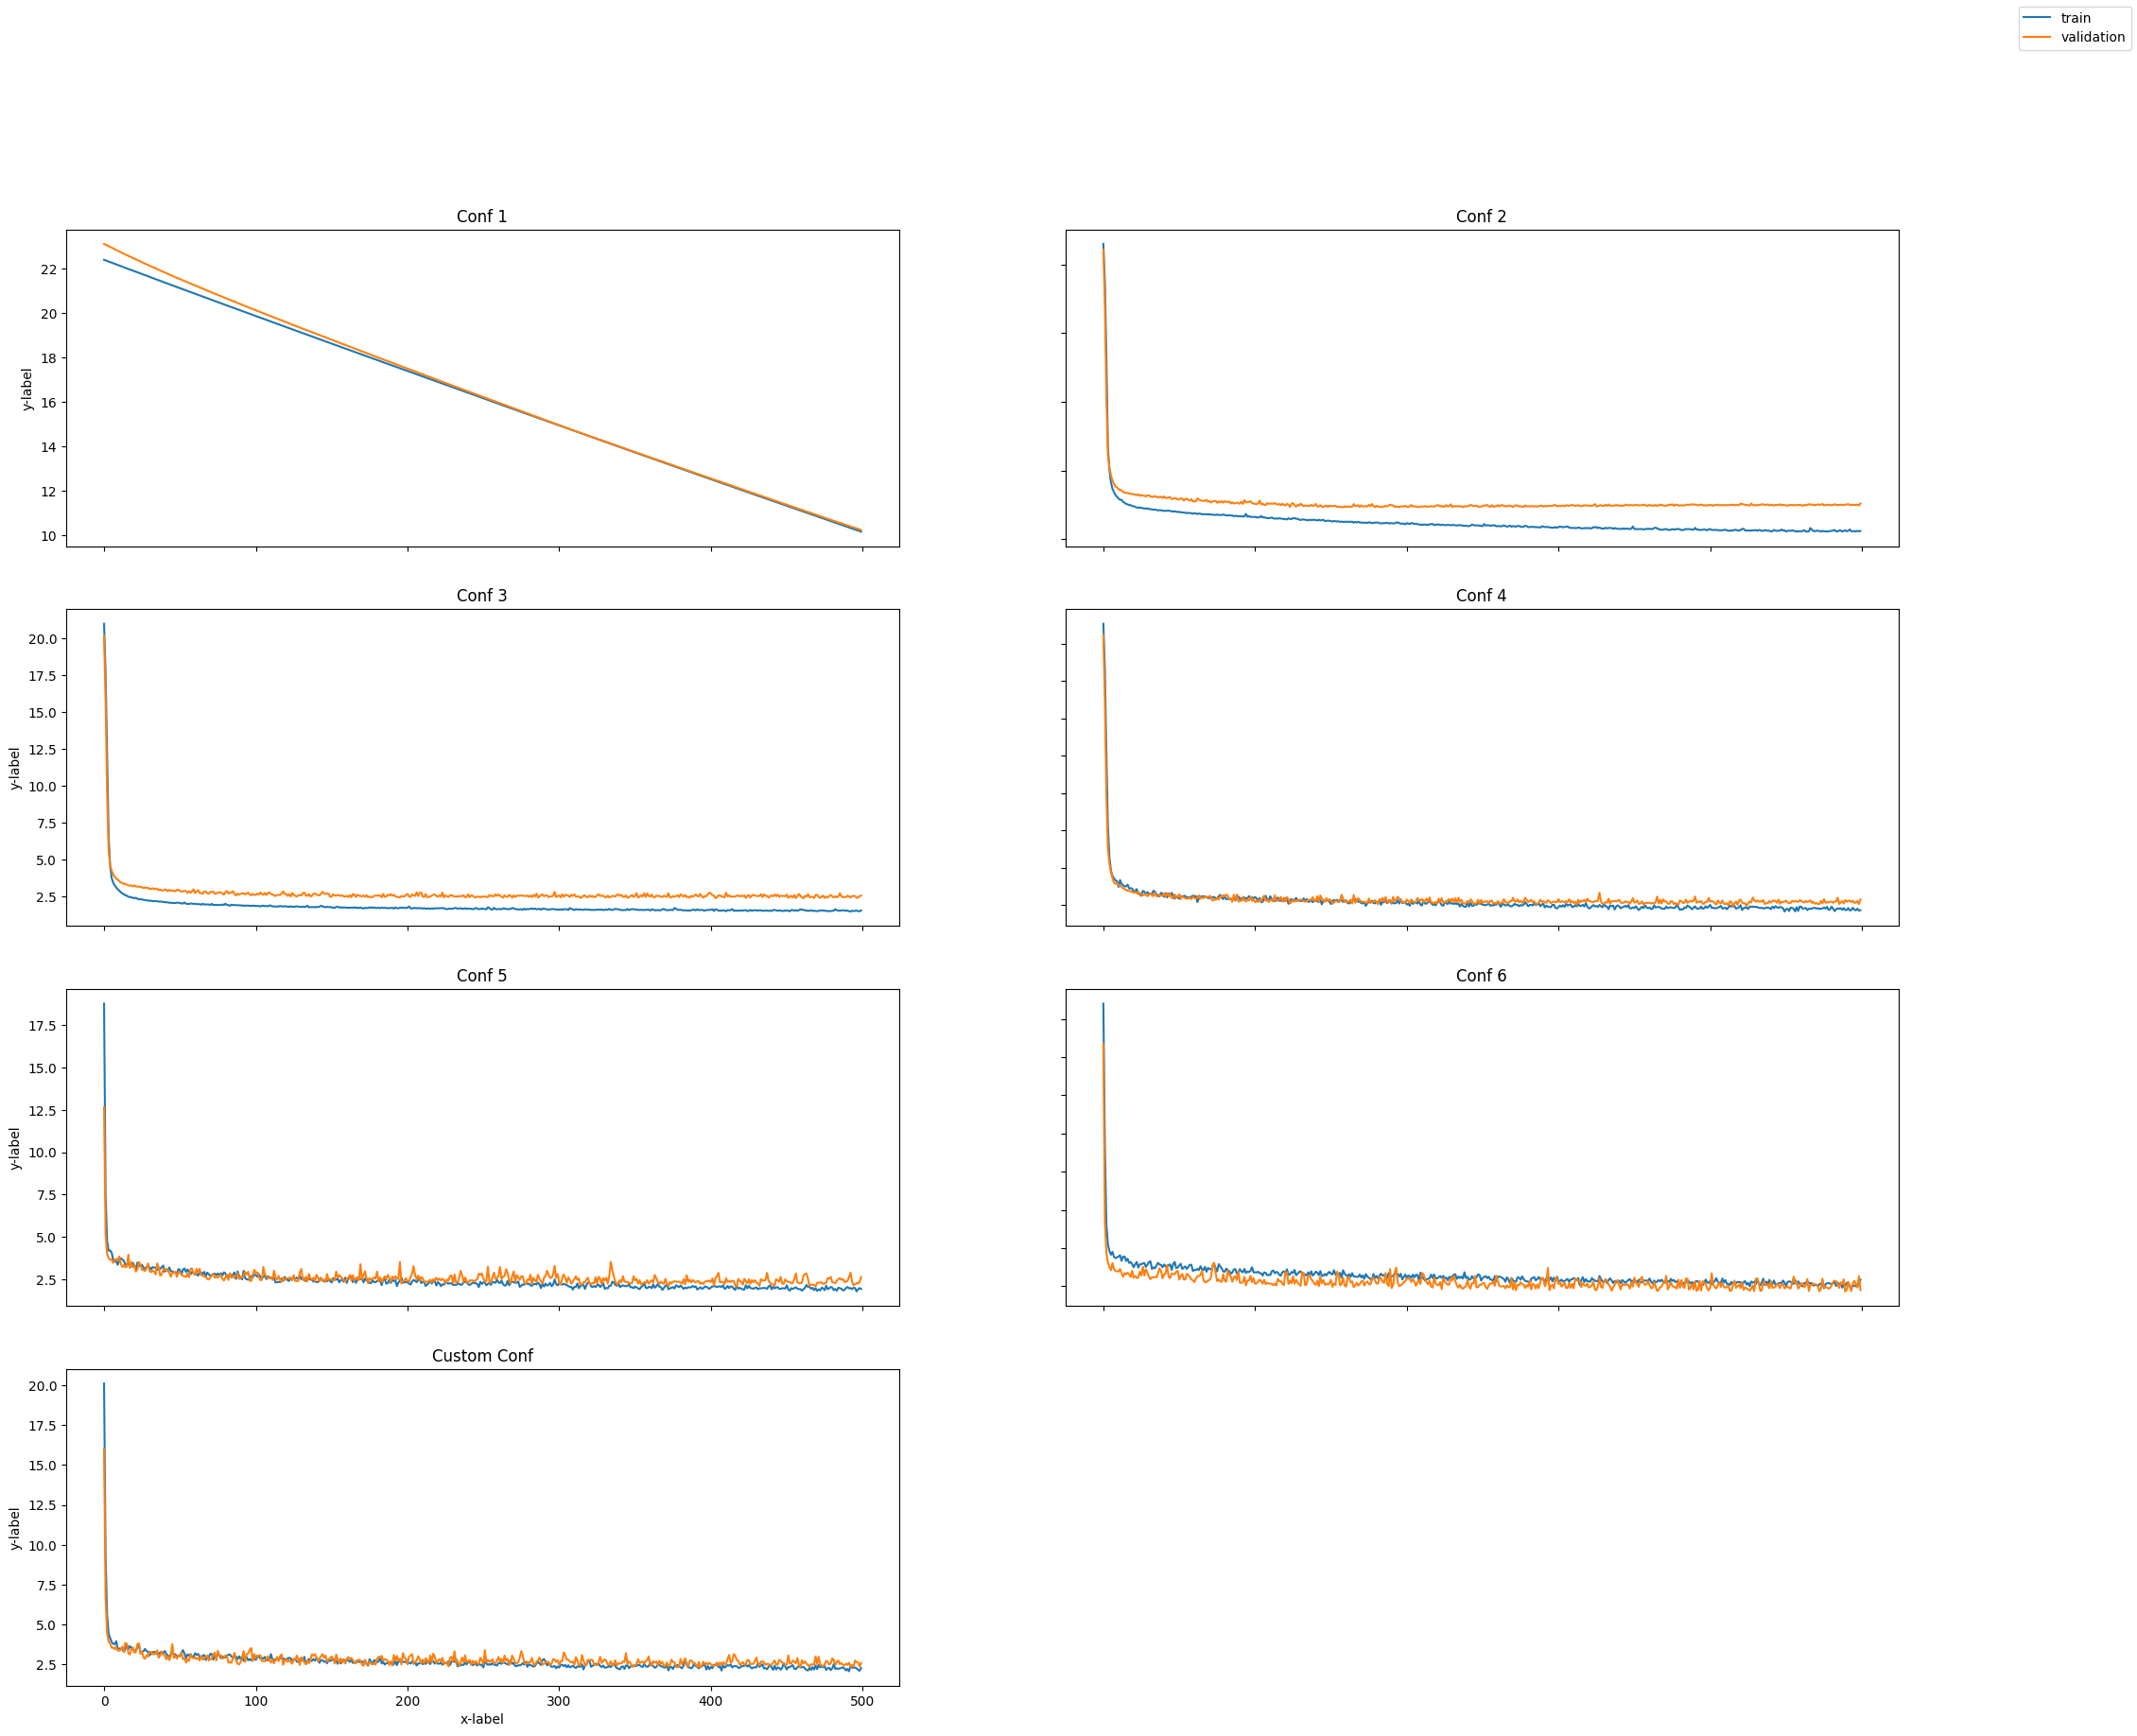

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2)

axes[0, 0].plot(history1.history["mean_absolute_error"])
axes[0, 0].plot(history1.history["val_mean_absolute_error"])
axes[0, 0].set_title('Conf 1')

axes[0, 1].plot(history2.history["mean_absolute_error"])
axes[0, 1].plot(history2.history["val_mean_absolute_error"])
axes[0, 1].set_title('Conf 2')

axes[1, 0].plot(history3.history["mean_absolute_error"])
axes[1, 0].plot(history3.history["val_mean_absolute_error"])
axes[1, 0].set_title('Conf 3')

axes[1, 1].plot(history4.history["mean_absolute_error"])
axes[1, 1].plot(history4.history["val_mean_absolute_error"])
axes[1, 1].set_title('Conf 4')

axes[2, 0].plot(history5.history["mean_absolute_error"])
axes[2, 0].plot(history5.history["val_mean_absolute_error"])
axes[2, 0].set_title('Conf 5')

axes[2, 1].plot(history6.history["mean_absolute_error"])
axes[2, 1].plot(history6.history["val_mean_absolute_error"])
axes[2, 1].set_title('Conf 6')

axes[3, 0].plot(history7.history["mean_absolute_error"])
axes[3, 0].plot(history7.history["val_mean_absolute_error"])
axes[3, 0].set_title('Custom Conf')

axes[3, 1].axis('off')

fig.legend(["train", "validation"], loc="upper right")
fig.set_figheight(20)
fig.set_figwidth(25)

for ax in axes.flat:
  ax.set(xlabel='x-label', ylabel='y-label')

for ax in axes.flat:
  ax.label_outer()